1. Download and store 1m/15m/30m/1h closing prices from solid/prospecting exchanges (Binance for now)
2. Feed it to the /modules
3. Store the results (there maybe are some global adjustments needed in order to lay down approptiate structure).
4. Build live running order exec
* think about volatility filter in further steps

In [38]:
# maybe I should ommit the vectorised backtester and go with iterative straight away?

In [39]:
# CONFIG
report_dir = "TEST_1_REPORT"
ticker_intervals = ["30m", "15m", "1m"]

In [40]:
%load_ext autoreload
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from modules.CointAnalyzer import Coint_Analyzer
from modules.IterativeBacktester import IterativeBacktester



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2 style="color:yellow;">CORR_COINT ANALYSIS</h2>

In [41]:
%autoreload
coint_analyzer = Coint_Analyzer(
  raw_data_path="../raw_data/BINANCE_DOWNLOADER_TESTS/",
  closing_prices_container_paths=[
            "binance_historical_15m_FUTURES_5713e12a-36e8-4e21-8ec0-831de3a90f10"],
  processed_data_path="../processed_data/ANALYZER_TEST/",
  interval="15m",
  days_filter=380,
  corr_filter=0.95,
  # cache_path="../processed_data/ANALYZER_TEST/CACHE_TESTS/coint_anal_cache_1h_244f32bd-dcca-484c-9b59-875a132d3dbd.csv"
)

KeyboardInterrupt: 

In [ ]:
coint_analyzer.generate_co_matrices(vanilla_kalman=True, raw_spread=False, create_cache=True, save_spreads=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
pair="VETUSDT_FUTURES-NEOUSDT_FUTURES".split("-")
historical_dir_path = "../raw_data/BINANCE_DOWNLOADER_TESTS/binance_historical_1h_FUTURES_e9ed8343-70ff-45c9-b262-69de65bbf28b/"
df_closings = pd.DataFrame()

for instrument in pair:
  df = pd.read_csv('%s%s_1h.csv' % (historical_dir_path, instrument),
                             index_col="Date", parse_dates=["Date"])
  df = df[["Close"]].copy()
  df.columns = [instrument]
  df["%s_returns" % instrument] = df[instrument] / \
                df[instrument].shift(1) - 1
  df_closings = pd.concat([df_closings, df], axis=1)

df_closings.dropna(inplace=True)
df_closings = df_closings.T.drop_duplicates().T
df_closings = df_closings.loc["2021-03-01 00:00:00":]
df_closings
# df_closings.loc["2021-03-01 00:00:00"]


# df_sp = pd.read_csv("../processed_data/ANALYZER_TEST/coint_pairs_1h_58cda278-c6f3-4659-bcbc-d2fc8af82bde/ADAUSDT_FUTURES_ADABUSD_FUTURES_spread.csv", index_col=0)

In [ ]:
inst_1 = pair[0]
inst_2 = pair[1]

<h2 style="color:yellow;">ITERATIVE BACKETESTING</h2>

In [59]:
%autoreload

backtester = IterativeBacktester(
  pair="1INCHUSDT_FUTURES-COTIUSDT_FUTURES".split("-"),
  ticker_interval="1h",
  raw_data_path="../raw_data/BINANCE_DOWNLOADER_TESTS/binance_historical_1h_FUTURES_e9ed8343-70ff-45c9-b262-69de65bbf28b/",
  save_dir_path="../processed_data/BACKTESTER_TEST/",
  tc=0.0006
)

<h2 style="color: yellow">BIN<h2>

In [ ]:
import numpy as np
import pandas as pd
from itertools import product

In [ ]:
backtester.optimize_pair(
  windows_range=(360, 500,190),
  short_entries_range=(99,100,1),
  long_entries_range=(2, 3, 1),
  sl_range=(-0.20, -0.03, 0.08),
  tp_range=(0.02, 0.03, 0.01),
  initial_balance=1000,
  report=True,
  charts=True,
  cache_process=True,
  cache_path="../processed_data/BACKTESTER_TEST/ENJUSDT_FUTURES_ZENUSDT_FUTURES_30m/ENJUSDT_FUTURES_ZENUSDT_FUTURES_optimization_overview_cache.csv"
)

Couldn't find start_date: 2021-03-01 00:00:00
 600 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 601 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 602 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 603 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 604 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 605 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 606 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 607 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 608 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 609 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 610 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 611 / 14862  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
Current Balance: 1000
 612 / 14862  CUM RET: 0.0%  CURENT NET: 0

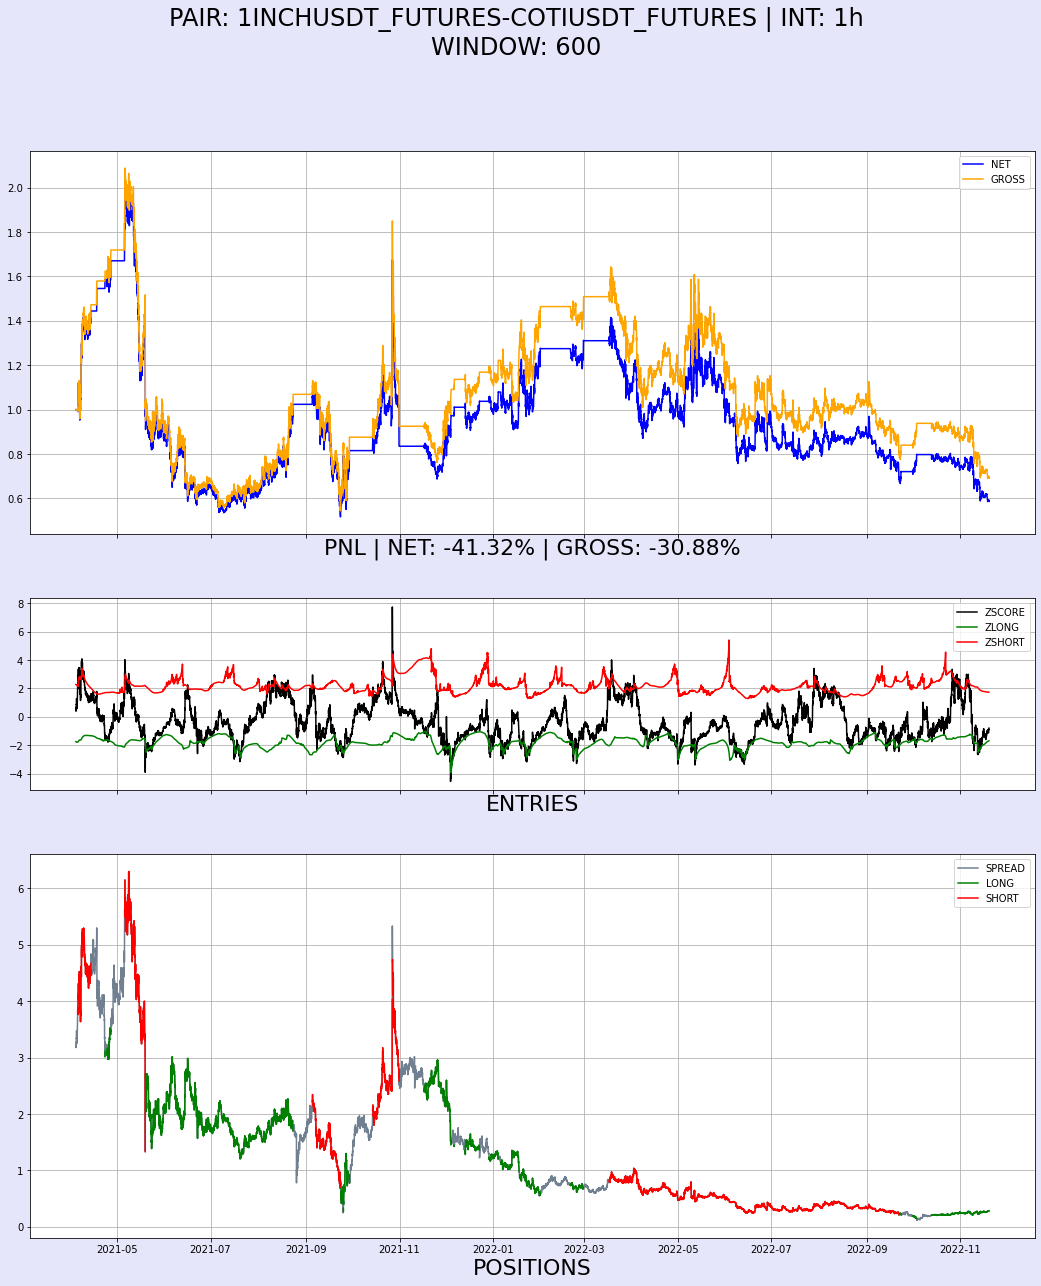

In [62]:
backtester.backtest_pair(
  z_long_perc=1,
  z_short_perc=99,
  tp=0.02,
  sl=-0.5,
  charts=True,
  silent=False,
  window=600,
  start_date="2021-03-01 00:00:00",
  initial_balance=1000,
  # use_raw_spread=True,
  # use_pykalman=True
  # stationarity_testing=True,
)

In [63]:
backtester.current_balance

-121.36525523647384

In [ ]:
backtester.data.iloc[10].loc['COTIUSDT_FUTURES']

0.42623

In [ ]:
backtester.data.loc["2021-03-10 10:00:00", "COTIUSDT_FUTURES"]

0.45803

In [ ]:
df = backtester.result.copy()
pair=backtester.pair
inst1 = pair[0]
inst2 = pair[1]

In [ ]:
df['dailyret'] = (backtester.data['%s_logs' % inst1]* -df['signals'].shift(1)) + (backtester.data['%s_logs' % inst2]*df['signals'].shift(1))
df['gross'] = df['dailyret'].cumsum().apply(np.exp)

df['trades'] = df.signals.diff().fillna(0).abs()*2
dailyret_net = df['dailyret'] - df['trades']*backtester.tc
df['net'] = dailyret_net.cumsum().apply(np.exp)

In [ ]:
df

1INCHUSDT_FUTURES_position  COTIUSDT_FUTURES_position  \
Date                                                                         
2021-10-01 01:00:00                         0.0                        0.0   
2021-10-01 02:00:00                         0.0                        0.0   
2021-10-01 03:00:00                         0.0                        0.0   
2021-10-01 04:00:00                         0.0                        0.0   
2021-10-01 05:00:00                         0.0                        0.0   
...                                         ...                        ...   
2022-11-19 10:00:00                         0.0                        0.0   
2022-11-19 11:00:00                         0.0                        0.0   
2022-11-19 12:00:00                         0.0                        0.0   
2022-11-19 13:00:00                         0.0                        0.0   
2022-11-19 14:00:00                         0.0                        0.0   

                     signals    spread  hedge_ratio    zscore    z_long  \
Date                                                                      
2021-10-01 01:00:00      0.0  1.495113    -1.868421 -1.121303 -1.810425   
2021-10-01 02:00:00      0.0  1.456756    -1.867907 -1.196210 -1.806710   
2021-10-01 03:00:00      0.0  1.468483    -1.867363 -1.168798 -1.803183   
2021-10-01 04:00:00      0.0  1.468495    -1.866853 -1.165363 -1.799665   
2021-10-01 05:00:00      0.0  1.502803    -1.866526 -1.092014 -1.796503   
...                      ...       ...          ...       ...       ...   
2022-11-19 10:00:00      0.0  0.490875    -0.527193 -0.972367 -1.765557   
2022-11-19 11:00:00      0.0  0.493534    -0.527321 -0.902464 -1.764358   
2022-11-19 12:00:00      0.0  0.493072    -0.527457 -0.913237 -1.763154   
2022-11-19 13:00:00      0.0  0.491982    -0.527611 -0.940155 -1.761859   
2022-11-19 14:00:00      0.0  0.496838    -0.527786 -0.813823 -1.760984   

                      z_short  gross_returns  net_returns  gross_cum  \
Date                                                                   
2021-10-01 01:00:00  1.830513            0.0          0.0   1.000000   
2021-10-01 02:00:00  1.840315            0.0          0.0   1.000000   
2021-10-01 03:00:00  1.842480            0.0          0.0   1.000000   
2021-10-01 04:00:00  1.844599            0.0          0.0   1.000000   
2021-10-01 05:00:00  1.838938            0.0          0.0   1.000000   
...                       ...            ...          ...        ...   
2022-11-19 10:00:00  1.895800            0.0          0.0   0.935355   
2022-11-19 11:00:00  1.895620            0.0          0.0   0.935355   
2022-11-19 12:00:00  1.895385            0.0          0.0   0.935355   
2022-11-19 13:00:00  1.895011            0.0          0.0   0.935355   
2022-11-19 14:00:00  1.894570            0.0          0.0   0.935355   

                      net_cum  dailyret    gross  trades       net  
Date                                                                
2021-10-01 01:00:00  1.000000       NaN      NaN     0.0       NaN  
2021-10-01 02:00:00  1.000000       0.0  1.00000     0.0  1.000000  
2021-10-01 03:00:00  1.000000       0.0  1.00000     0.0  1.000000  
2021-10-01 04:00:00  1.000000       0.0  1.00000     0.0  1.000000  
2021-10-01 05:00:00  1.000000      -0.0  1.00000     0.0  1.000000  
...                       ...       ...      ...     ...       ...  
2022-11-19 10:00:00  0.887333       0.0  1.03786     0.0  0.984482  
2022-11-19 11:00:00  0.887333       0.0  1.03786     0.0  0.984482  
2022-11-19 12:00:00  0.887333       0.0  1.03786     0.0  0.984482  
2022-11-19 13:00:00  0.887333       0.0  1.03786     0.0  0.984482  
2022-11-19 14:00:00  0.887333       0.0  1.03786     0.0  0.984482  

[9950 rows x 16 columns]